# MACD
## Moving Average Convergence and Divergence
This is a simple and effective Strategy trend-following indicator.

This strategy uses
* MACD = 26 day EMA of 'Close' - 12 Days EMA of 'Close' 
* Signal = 9 day EMA of MACD

The trading Strategy signals are generated using the MACD and Signals

* when MACD crosses above Signal, we go long on the Underlying Security
* When MACD Crosses below Signal, then we go short on it

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf
%matplotlib inline 

In [2]:
# lets the stock whose signals we are going to check 
ticker = 'ITC.NS'
end4 = datetime.date(2021, 12, 3)
start4 = end4 - pd.Timedelta(days = 252*3)

In [3]:
start4

datetime.date(2019, 11, 8)

In [4]:
df = yf.download(ticker , start4 , end4)
df.shape


[*********************100%***********************]  1 of 1 completed


(514, 6)

In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-26,228.899994,230.050003,223.100006,224.000000,224.000000,27027022
2021-11-29,222.000000,223.649994,220.199997,221.500000,221.500000,22132952
2021-11-30,222.000000,225.199997,220.000000,221.149994,221.149994,23503453
2021-12-01,222.000000,223.300003,220.600006,221.899994,221.899994,12995800
2021-12-02,221.899994,226.149994,221.300003,225.449997,225.449997,15904846


In [6]:
df4 = df.copy()

In [7]:
df4['ema26'] = df4['Close'].ewm(span = 26 , adjust = False).mean()
df4['ema12'] = df4['Close'].ewm(span = 12 , adjust = False).mean()
df4['MACD'] = df4['ema12'] - df4['ema26']



<AxesSubplot:xlabel='Date'>

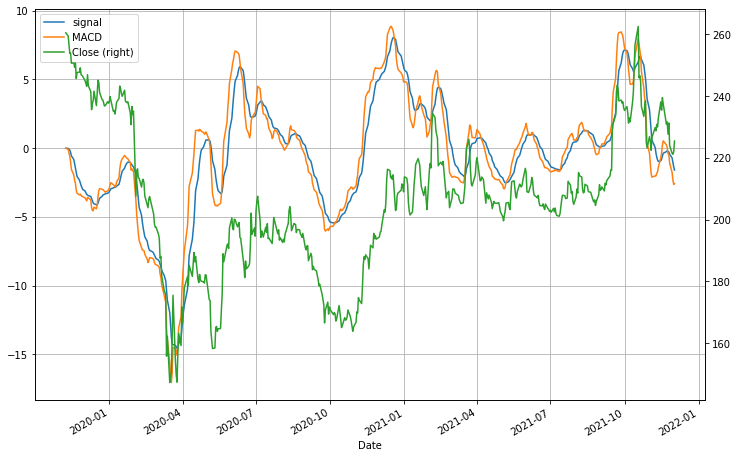

In [8]:
df4['signal'] = df4['MACD'].ewm(span = 9, adjust = False).mean()
df4[['signal', 'MACD' , 'Close']].plot(figsize = (12, 8), grid = True , secondary_y= 'Close')

In [9]:
df4['position'] = np.where(df4['MACD']> df4['signal'] ,1,0 )
df4['position'] = df4['position'].shift(1)

In [10]:
df4.tail()

,Open,High,Low,Close,Adj Close,Volume,ema26,ema12,MACD,signal,position
Date,,,,,,,,,,,
2021-11-26,228.899994,230.050003,223.100006,224.000000,224.000000,27027022,232.080836,230.999670,-1.081166,-0.433981,0.0
2021-11-29,222.000000,223.649994,220.199997,221.500000,221.500000,22132952,231.297070,229.538182,-1.758888,-0.698962,0.0
2021-11-30,222.000000,225.199997,220.000000,221.149994,221.149994,23503453,230.545435,228.247692,-2.297743,-1.018718,0.0
2021-12-01,222.000000,223.300003,220.600006,221.899994,221.899994,12995800,229.905032,227.271123,-2.633909,-1.341756,0.0
2021-12-02,221.899994,226.149994,221.300003,225.449997,225.449997,15904846,229.575029,226.990950,-2.584080,-1.590221,0.0


In [11]:
df4['cc_returns'] = df4['Close'].pct_change()
df4['strategy_returns'] = df4['cc_returns']*df4['position']



In [12]:
df4.tail(20)

,Open,High,Low,Close,Adj Close,Volume,ema26,ema12,MACD,signal,position,cc_returns,strategy_returns
Date,,,,,,,,,,,,,
2021-11-03,226.000000,226.850006,221.699997,222.449997,222.449997,17843327,233.338968,231.501893,-1.837075,1.256750,0.0,-0.013963,-0.000000
2021-11-04,224.850006,227.300003,224.000000,226.550003,226.550003,7024796,232.836082,230.740064,-2.096018,0.586196,0.0,0.018431,0.000000
2021-11-08,229.699997,230.699997,225.699997,229.800003,229.800003,20270558,232.611187,230.595439,-2.015748,0.065807,0.0,0.014346,0.000000
2021-11-09,229.850006,230.899994,227.850006,228.750000,228.750000,11520817,232.325173,230.311525,-2.013648,-0.350084,0.0,-0.004569,-0.000000
2021-11-10,227.449997,232.850006,227.199997,230.850006,230.850006,13431108,232.215902,230.394368,-1.821533,-0.644374,0.0,0.009180,0.000000
2021-11-11,230.399994,231.500000,228.550003,230.000000,230.000000,8134962,232.051761,230.333696,-1.718064,-0.859112,0.0,-0.003682,-0.000000
2021-11-12,231.199997,233.949997,229.149994,232.899994,232.899994,11855531,232.114593,230.728511,-1.386081,-0.964506,0.0,0.012609,0.000000
2021-11-15,233.949997,239.000000,233.100006,238.100006,238.100006,38755267,232.557957,231.862587,-0.695369,-0.910678,0.0,0.022327,0.000000
2021-11-16,239.050003,239.649994,235.000000,235.449997,235.449997,14675969,232.772182,232.414497,-0.357685,-0.800080,1.0,-0.011130,-0.011130


In [13]:
df4['cumulative_returns'] = (1 + df4['strategy_returns']).cumprod()-1

In [14]:
df4.tail()

,Open,High,Low,Close,Adj Close,Volume,ema26,ema12,MACD,signal,position,cc_returns,strategy_returns,cumulative_returns
Date,,,,,,,,,,,,,,
2021-11-26,228.899994,230.050003,223.100006,224.000000,224.000000,27027022,232.080836,230.999670,-1.081166,-0.433981,0.0,-0.031561,-0.0,0.321084
2021-11-29,222.000000,223.649994,220.199997,221.500000,221.500000,22132952,231.297070,229.538182,-1.758888,-0.698962,0.0,-0.011161,-0.0,0.321084
2021-11-30,222.000000,225.199997,220.000000,221.149994,221.149994,23503453,230.545435,228.247692,-2.297743,-1.018718,0.0,-0.001580,-0.0,0.321084
2021-12-01,222.000000,223.300003,220.600006,221.899994,221.899994,12995800,229.905032,227.271123,-2.633909,-1.341756,0.0,0.003391,0.0,0.321084
2021-12-02,221.899994,226.149994,221.300003,225.449997,225.449997,15904846,229.575029,226.990950,-2.584080,-1.590221,0.0,0.015998,0.0,0.321084


<AxesSubplot:xlabel='Date'>

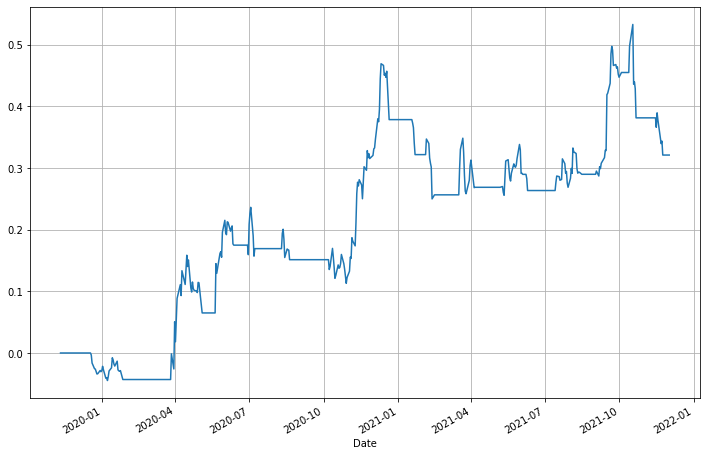

In [15]:
df4['cumulative_returns'].plot(figsize = (12, 8), grid = True)
# df4[['cumulative_returns' , 'position']].plot(figsize= (12, 8) , secondary_y = 'position', grid = True)


,Open,High,Low,Close,Adj Close,Volume,ema26,ema12,MACD,signal,position,cc_returns,strategy_returns,cumulative_returns
Date,,,,,,,,,,,,,,
2021-11-26,228.899994,230.050003,223.100006,224.000000,224.000000,27027022,232.080836,230.999670,-1.081166,-0.433981,0.0,-0.031561,-0.0,0.321084
2021-11-29,222.000000,223.649994,220.199997,221.500000,221.500000,22132952,231.297070,229.538182,-1.758888,-0.698962,0.0,-0.011161,-0.0,0.321084
2021-11-30,222.000000,225.199997,220.000000,221.149994,221.149994,23503453,230.545435,228.247692,-2.297743,-1.018718,0.0,-0.001580,-0.0,0.321084
2021-12-01,222.000000,223.300003,220.600006,221.899994,221.899994,12995800,229.905032,227.271123,-2.633909,-1.341756,0.0,0.003391,0.0,0.321084
2021-12-02,221.899994,226.149994,221.300003,225.449997,225.449997,15904846,229.575029,226.990950,-2.584080,-1.590221,0.0,0.015998,0.0,0.321084


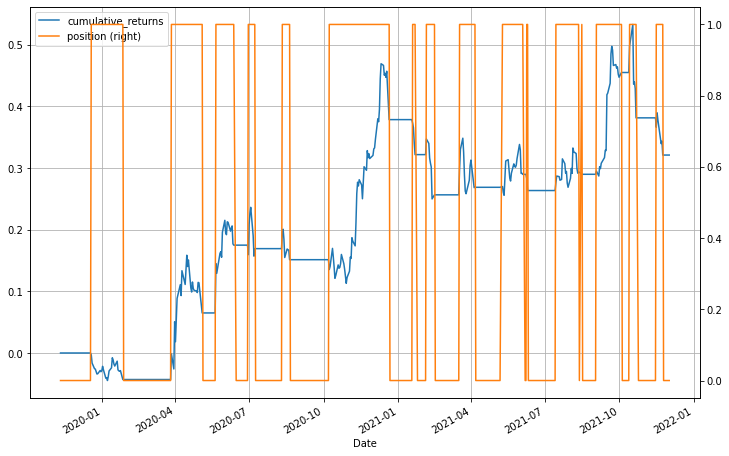

In [16]:
df4[['cumulative_returns' , 'position' ]].plot(figsize= (12, 8) , secondary_y = 'position', grid = True)
df4.tail()

In [17]:
df4.tail(5)

,Open,High,Low,Close,Adj Close,Volume,ema26,ema12,MACD,signal,position,cc_returns,strategy_returns,cumulative_returns
Date,,,,,,,,,,,,,,
2021-11-26,228.899994,230.050003,223.100006,224.000000,224.000000,27027022,232.080836,230.999670,-1.081166,-0.433981,0.0,-0.031561,-0.0,0.321084
2021-11-29,222.000000,223.649994,220.199997,221.500000,221.500000,22132952,231.297070,229.538182,-1.758888,-0.698962,0.0,-0.011161,-0.0,0.321084
2021-11-30,222.000000,225.199997,220.000000,221.149994,221.149994,23503453,230.545435,228.247692,-2.297743,-1.018718,0.0,-0.001580,-0.0,0.321084
2021-12-01,222.000000,223.300003,220.600006,221.899994,221.899994,12995800,229.905032,227.271123,-2.633909,-1.341756,0.0,0.003391,0.0,0.321084
2021-12-02,221.899994,226.149994,221.300003,225.449997,225.449997,15904846,229.575029,226.990950,-2.584080,-1.590221,0.0,0.015998,0.0,0.321084


In [18]:
df4.head(50)
df4['Net_profit'] = df4['strategy_returns']* df4['Adj Close']

In [19]:
#Lets the final Returns
print('Buy and hold returns', np.round(df4['cc_returns'].cumsum()[-1],2))
print('Strategy_returns', np.round(df4['cumulative_returns'][-1],2))

# print('Net Profit', np.round(df4['Net_profit'].cumsum()[-1],2))
# print('sell Price' , '1029' )
sell_price = 1029 


Buy and hold returns -0.03
Strategy_returns 0.32


In [20]:

import pyfolio as pf

C:\Users\ROHIT\opencv\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Start date,2019-11-08
End date,2021-12-02
Total months,24
,Backtest
Annual return,14.6%
Cumulative returns,32.1%
Annual volatility,20.4%
Sharpe ratio,0.77
Calmar ratio,0.98
Stability,0.77
Max drawdown,-14.9%


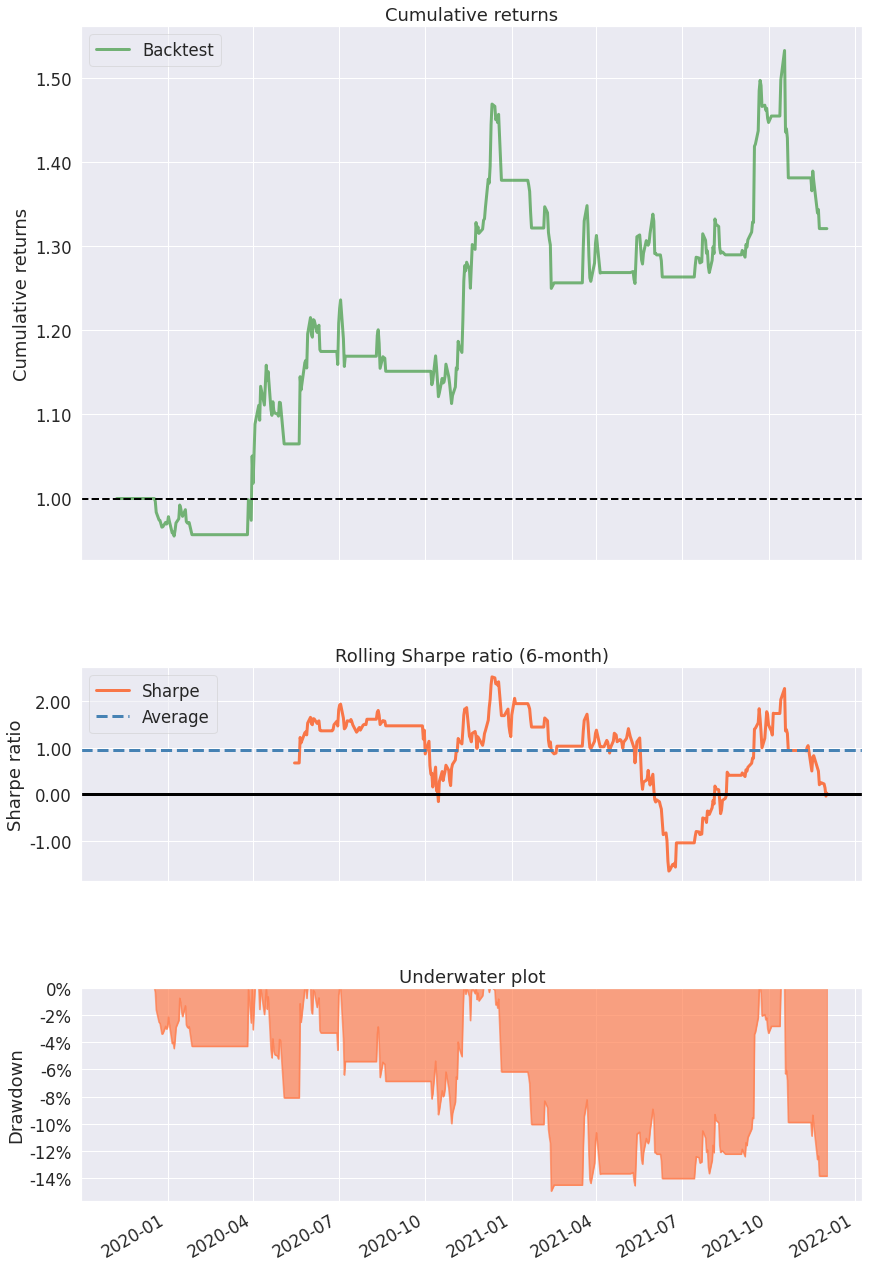

In [21]:
 pf.create_simple_tear_sheet(df4['strategy_returns'])